In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import regularizers

In [2]:
print(tf.__version__)

1.12.0


# Load the IMDB dataset

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Preparing the data

In [4]:
# Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# Vectorized training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 1. Reducing the network's size

In [5]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)))
original_model.add(layers.Dense(16, activation=tf.nn.relu))
original_model.add(layers.Dense(1, activation=tf.nn.sigmoid))

original_model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [6]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation=tf.nn.relu, input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation=tf.nn.relu))
smaller_model.add(layers.Dense(1, activation=tf.nn.sigmoid))

smaller_model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [7]:
original_hist = original_model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.4987 - binary_accuracy: 0.8169 - val_loss: 0.3770 - val_binary_accuracy: 0.8709
Epoch 2/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.2850 - binary_accuracy: 0.9062 - val_loss: 0.3063 - val_binary_accuracy: 0.8775
Epoch 3/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.2142 - binary_accuracy: 0.9241 - val_loss: 0.2810 - val_binary_accuracy: 0.8885
Epoch 4/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.1776 - binary_accuracy: 0.9387 - val_loss: 0.3004 - val_binary_accuracy: 0.8788
Epoch 5/20
25000/25000 [==============================] - 2s 100us/step - loss: 0.1538 - binary_accuracy: 0.9466 - val_loss: 0.3129 - val_binary_accuracy: 0.8776
Epoch 6/20
25000/25000 [==============================] - 2s 100us/step - loss: 0.1372 - binary_accuracy: 0.9523 - val_loss: 0.3439 - val_binar

In [8]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.5902 - binary_accuracy: 0.7530 - val_loss: 0.5176 - val_binary_accuracy: 0.8202
Epoch 2/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.4379 - binary_accuracy: 0.8758 - val_loss: 0.4073 - val_binary_accuracy: 0.8692
Epoch 3/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.3348 - binary_accuracy: 0.9026 - val_loss: 0.3397 - val_binary_accuracy: 0.8836
Epoch 4/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.2705 - binary_accuracy: 0.9156 - val_loss: 0.3039 - val_binary_accuracy: 0.8884
Epoch 5/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.2294 - binary_accuracy: 0.9249 - val_loss: 0.2868 - val_binary_accuracy: 0.8885
Epoch 6/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.2007 - binary_accuracy: 0.9333 - val_loss: 0.2804 - val_binary_

In [9]:
history_dict = original_hist.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


In [10]:
epochs = range(1,21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

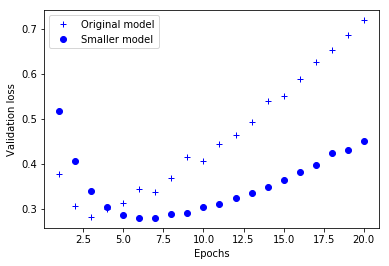

In [11]:
# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- The smaller network starts overfitting later than the reference network (after six epochs rather than four), and its performance degrades more slowly once it starts overfitting.

In [12]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation=tf.nn.relu, input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation=tf.nn.relu))
bigger_model.add(layers.Dense(1, activation=tf.nn.sigmoid))

bigger_model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [13]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 13s 520us/step - loss: 0.4606 - binary_accuracy: 0.7984 - val_loss: 0.2952 - val_binary_accuracy: 0.8786
Epoch 2/20
25000/25000 [==============================] - 12s 480us/step - loss: 0.2192 - binary_accuracy: 0.9123 - val_loss: 0.2790 - val_binary_accuracy: 0.8858
Epoch 3/20
25000/25000 [==============================] - 12s 480us/step - loss: 0.1176 - binary_accuracy: 0.9550 - val_loss: 0.4455 - val_binary_accuracy: 0.8386
Epoch 4/20
25000/25000 [==============================] - 12s 482us/step - loss: 0.0739 - binary_accuracy: 0.9771 - val_loss: 0.6934 - val_binary_accuracy: 0.7805
Epoch 5/20
25000/25000 [==============================] - 12s 484us/step - loss: 0.0422 - binary_accuracy: 0.9883 - val_loss: 0.4747 - val_binary_accuracy: 0.8810
Epoch 6/20
25000/25000 [==============================] - 12s 485us/step - loss: 0.0019 - binary_accuracy: 0.9998 - val_loss: 0.7004 - 

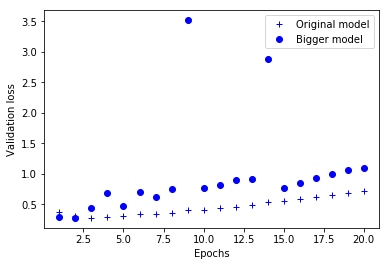

In [14]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- The bigger network starts overfitting almost immediately, after just one epoch, and it overfits much more severely. Its validation loss is also noisier.

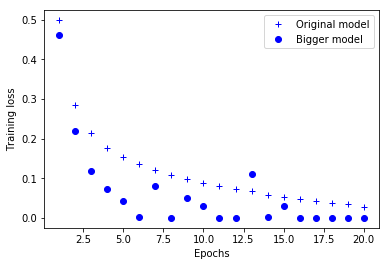

In [15]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

- The bigger network gets its training loss near zero very quickly. The more capacity the network has, the more quickly it can model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large difference between the training and validation loss). 

# 2. Adding weight regularization

In [16]:
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation=tf.nn.relu,
                          input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation=tf.nn.relu))
l2_model.add(layers.Dense(1, activation=tf.nn.sigmoid))

In [17]:
l2_model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [18]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.5087 - binary_accuracy: 0.8180 - val_loss: 0.4012 - val_binary_accuracy: 0.8714
Epoch 2/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.3276 - binary_accuracy: 0.9040 - val_loss: 0.3378 - val_binary_accuracy: 0.8900
Epoch 3/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.2774 - binary_accuracy: 0.9190 - val_loss: 0.3295 - val_binary_accuracy: 0.8890
Epoch 4/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.2544 - binary_accuracy: 0.9262 - val_loss: 0.3323 - val_binary_accuracy: 0.8876
Epoch 5/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.2399 - binary_accuracy: 0.9336 - val_loss: 0.3496 - val_binary_accuracy: 0.8786
Epoch 6/20
25000/25000 [==============================] - 2s 93us/step - loss: 0.2313 - binary_accuracy: 0.9368 - val_loss: 0.3436 - val_binar

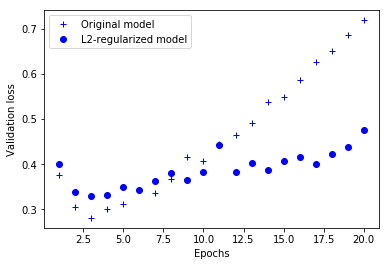

In [19]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- The model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), even though both models have the same number of parameters.

In [20]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
                          activation=tf.nn.relu,
                          input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
                          activation=tf.nn.relu))
l1_model.add(layers.Dense(1, activation=tf.nn.sigmoid))

l1_model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 113us/step - loss: 0.9171 - binary_accuracy: 0.7748 - val_loss: 0.6719 - val_binary_accuracy: 0.8252
Epoch 2/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.6306 - binary_accuracy: 0.8418 - val_loss: 0.6202 - val_binary_accuracy: 0.8393
Epoch 3/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.5898 - binary_accuracy: 0.8530 - val_loss: 0.6085 - val_binary_accuracy: 0.8411
Epoch 4/20
25000/25000 [==============================] - 2s 93us/step - loss: 0.5704 - binary_accuracy: 0.8601 - val_loss: 0.5722 - val_binary_accuracy: 0.8597
Epoch 5/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.5664 - binary_accuracy: 0.8574 - val_loss: 0.6076 - val_binary_accuracy: 0.8317
Epoch 6/20
25000/25000 [==============================] - 2s 85us/step - loss: 0.5554 - binary_accuracy: 0.8616 - val_loss: 0.5627 - val_binary_

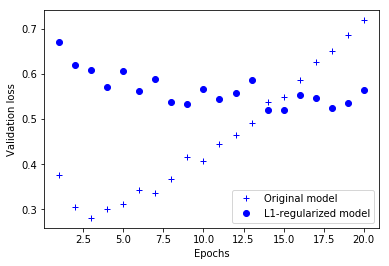

In [21]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [22]:
l1_l2_model = models.Sequential()
l1_l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                          activation=tf.nn.relu,
                          input_shape=(10000,)))
l1_l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                          activation=tf.nn.relu))
l1_l2_model.add(layers.Dense(1, activation=tf.nn.sigmoid))

l1_l2_model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.9822 - binary_accuracy: 0.6631 - val_loss: 0.7616 - val_binary_accuracy: 0.6812
Epoch 2/20
25000/25000 [==============================] - 2s 69us/step - loss: 0.7019 - binary_accuracy: 0.8142 - val_loss: 0.6867 - val_binary_accuracy: 0.7794
Epoch 3/20
25000/25000 [==============================] - 2s 70us/step - loss: 0.6218 - binary_accuracy: 0.8472 - val_loss: 0.6112 - val_binary_accuracy: 0.8417
Epoch 4/20
25000/25000 [==============================] - 2s 72us/step - loss: 0.5853 - binary_accuracy: 0.8585 - val_loss: 0.5726 - val_binary_accuracy: 0.8613
Epoch 5/20
25000/25000 [==============================] - 2s 71us/step - loss: 0.5673 - binary_accuracy: 0.8621 - val_loss: 0.5697 - val_binary_accuracy: 0.8586
Epoch 6/20
25000/25000 [==============================] - 2s 72us/step - loss: 0.5516 - binary_accuracy: 0.8662 - val_loss: 0.5513 - val_binary_a

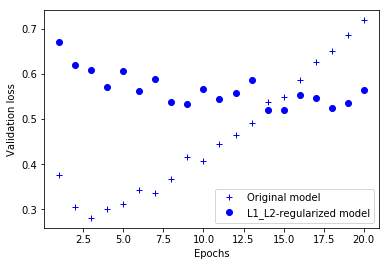

In [23]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1_L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# Dropout

In [24]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 89us/step - loss: 0.6030 - binary_accuracy: 0.6732 - val_loss: 0.4683 - val_binary_accuracy: 0.8517
Epoch 2/20
25000/25000 [==============================] - 2s 82us/step - loss: 0.4457 - binary_accuracy: 0.8111 - val_loss: 0.3388 - val_binary_accuracy: 0.8787
Epoch 3/20
25000/25000 [==============================] - 2s 66us/step - loss: 0.3533 - binary_accuracy: 0.8633 - val_loss: 0.2987 - val_binary_accuracy: 0.8850
Epoch 4/20
25000/25000 [==============================] - 2s 69us/step - loss: 0.3028 - binary_accuracy: 0.8920 - val_loss: 0.2791 - val_binary_accuracy: 0.8882
Epoch 5/20
25000/25000 [==============================] - 2s 72us/step - loss: 0.2587 - binary_accuracy: 0.9100 - val_loss: 0.2795 - val_binary_accuracy: 0.8866
Epoch 6/20
25000/25000 [==============================] - 2s 67us/step - loss: 0.2304 - binary_accuracy: 0.9230 - val_loss: 0.2896 - val_binary_a

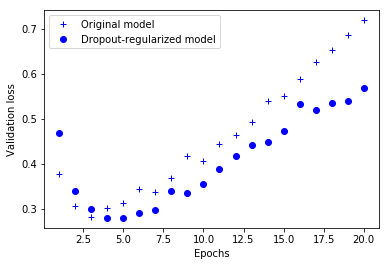

In [25]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()